### Load Image

(100, 100, 3)


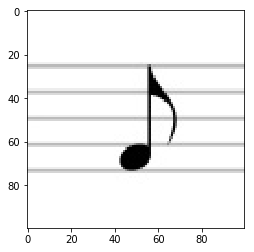

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import skfuzzy as fuzz
from pylab import *


img = cv2.imread(r'C:\Users\Josh\Desktop\DATASET\THESIS\quaver.jpg')


print(img.shape)
plt.imshow(img,cmap='gray')
plt.show()



### Horizontal Projection and Binarization

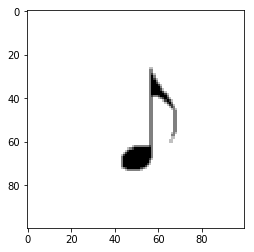

True

In [42]:

ret,noStaffNote = cv2.threshold(img,60,255,cv2.THRESH_BINARY)



noStaffNote = cv2.blur(noStaffNote,(2,2))

plt.imshow(noStaffNote,cmap='gray')
plt.show()

cv2.imwrite(r"C:\Users\Josh\Desktop\DATASET\THESIS\Test.jpg", noStaffNote)




### Canny Edge Detector

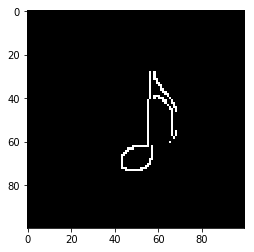

numpy.ndarray

In [27]:
edges = cv2.Canny(noStaffNote,100,200)
    
plt.imshow(edges,cmap='gray')
plt.show()

type(edges)

### Extracting Edge Transition Values (WIP)


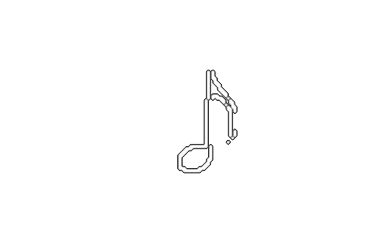

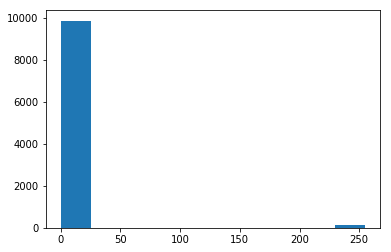

In [35]:
# create a new figure
figure()
gray()
# show contours with origin upper left corner
contour(edges, origin='image')
axis('equal')
axis('off')


figure()
features = array(edges)

hist(features.flatten(), 10)

show()

### Extracting NumPy Array for Fuzzy Membership 

In [68]:
edges

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)


### Describing the Fuzzy System


First create fuzzy membership functions which represent degree of truth related to a continuous variable variable.

In [77]:
edge = edges.flatten()
# Generate universe functions
temp = np.arange(30, 101, 1)
customers = np.arange(0, 36, 1)

print(edge)

# Membership functions for heat
t_hot = fuzz.trimf(temp, [65, 100, 100])
t_moderate = fuzz.trimf(temp, [30, 65, 100])
t_cool = fuzz.trapmf(temp, [20, 20, 30, 65])

# Membership functions for customers
c_crowded = fuzz.trimf(customers, [24, 35, 35])
c_busy = fuzz.trimf(customers, [0, 24, 35])
c_quiet = fuzz.trimf(customers, [0, 0, 24])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   

### Visualize Fuzzy System

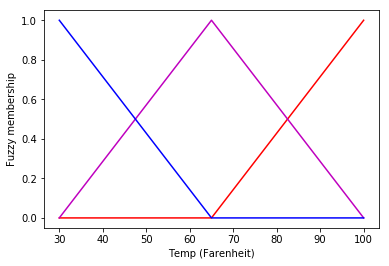

In [21]:
# Visualize membership functions for temperature
fig, ax = plt.subplots()

ax.plot(temp, tg_hot, 'r', temp, t_moderate, 'm', temp, t_cool, 'b')
ax.set_ylabel('Fuzzy membership')
ax.set_xlabel('Temp (Farenheit)')
ax.set_ylim(-0.05, 1.05);